In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    confusion_matrix, classification_report,
    mean_squared_error, r2_score
)

df = pd.read_csv('income_dataset.csv')
df.head()



,age,education_level,hours_per_week,experience_years,income,high_income
0,59,Masters,26,14,74900.0,1
1,49,PhD,22,6,78900.0,1
2,35,Bachelors,42,8,40300.0,0
3,63,High School,37,7,57700.0,0
4,28,Bachelors,57,22,50500.0,0


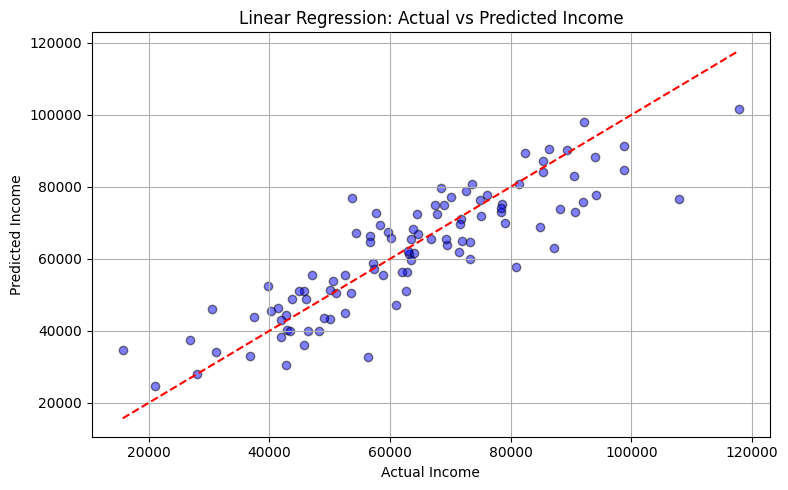

Linear Regression R² Score: 0.7575311987652696
Linear Regression RMSE: 9587.343290617948
Linear Regression Accuracy (R²): 0.7575311987652696


In [2]:
# -----------------------------
# Linear Regression
# -----------------------------
X_reg = df[['age', 'education_level', 'hours_per_week', 'experience_years']]
y_reg = df['income']

preprocessor_reg = ColumnTransformer(
    transformers=[('edu', OneHotEncoder(), ['education_level'])],
    remainder='passthrough'
)

linreg_pipeline = Pipeline([
    ('preprocessor', preprocessor_reg),
    ('regressor', LinearRegression())
])

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
linreg_pipeline.fit(X_train_reg, y_train_reg)
y_pred_reg = linreg_pipeline.predict(X_test_reg)


plt.figure(figsize=(8, 5))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5, color='blue', edgecolors='k')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel("Actual Income")
plt.ylabel("Predicted Income")
plt.title("Linear Regression: Actual vs Predicted Income")
plt.grid(True)
plt.tight_layout()
plt.show()

print("Linear Regression R² Score:", r2_score(y_test_reg, y_pred_reg))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))


print("Linear Regression Accuracy (R²):", linreg_pipeline.score(X_test_reg, y_test_reg))


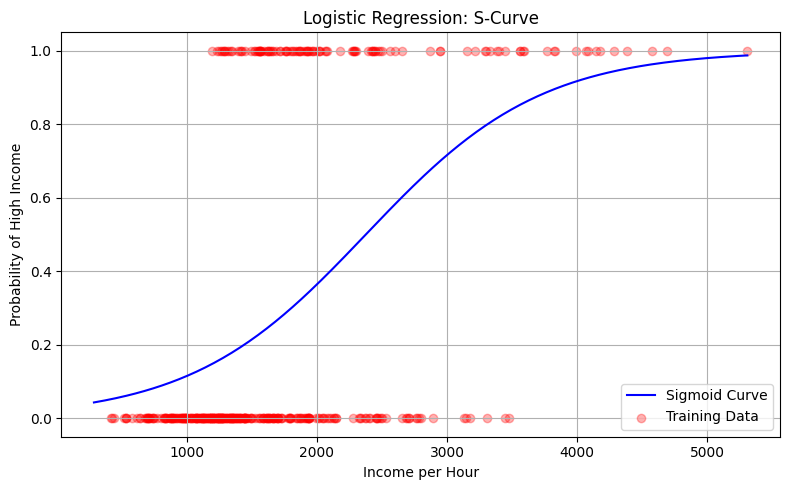

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.68      0.92      0.78        64
           1       0.62      0.22      0.33        36

    accuracy                           0.67       100
   macro avg       0.65      0.57      0.55       100
weighted avg       0.66      0.67      0.62       100

Logistic Regression Accuracy: 0.67


In [3]:
# -----------------------------
# Logistic Regression (S-Curve)
# -----------------------------
df["income_per_hour"] = df["income"] / df["hours_per_week"]
feature = df[["income_per_hour"]]
target = df["high_income"]

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


X_range = np.linspace(feature.min(), feature.max(), 300).reshape(-1, 1)
X_range_scaled = scaler.transform(X_range)


log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_probs = log_model.predict_proba(X_range_scaled)[:, 1]

# Plot sigmoid curve
plt.figure(figsize=(8, 5))
plt.plot(X_range, y_probs, color='blue', label='Sigmoid Curve')
plt.scatter(X_train, y_train, color='red', alpha=0.3, label='Training Data')
plt.xlabel("Income per Hour")
plt.ylabel("Probability of High Income")
plt.title("Logistic Regression: S-Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Print model performance
y_pred_log = log_model.predict(scaler.transform(X_test))
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

# Added line: Print accuracy score for logistic regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))


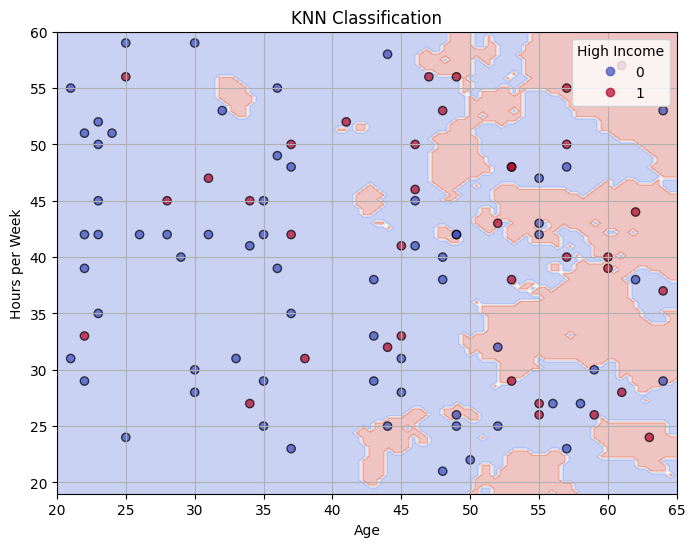

KNN Accuracy Score: 0.66


In [4]:
# -----------------------------
# K - Nearest Neighbors
# -----------------------------

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

features = ['age', 'hours_per_week']
X_vis = df[features]
y_vis = df['high_income']


X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)

# Scale features
scaler_vis = StandardScaler()
X_train_vis_scaled = scaler_vis.fit_transform(X_train_vis)
X_test_vis_scaled = scaler_vis.transform(X_test_vis)

# Train KNN on these two features
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_vis_scaled, y_train_vis)

# Predict on test set
y_pred_vis = knn_vis.predict(X_test_vis_scaled)

# Create a mesh grid for the background classification
x_min, x_max = X_vis['age'].min() - 1, X_vis['age'].max() + 1
y_min, y_max = X_vis['hours_per_week'].min() - 1, X_vis['hours_per_week'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Scale the grid points
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_scaled = scaler_vis.transform(grid_points)

# Get predictions for the grid points
Z = knn_vis.predict(grid_points_scaled).reshape(xx.shape)

# Plot classification regions as background
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)


scatter = plt.scatter(X_test_vis['age'], X_test_vis['hours_per_week'], c=y_test_vis, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.title('KNN Classification')
plt.legend(*scatter.legend_elements(), title="High Income")
plt.grid(True)
plt.show()


accuracy = accuracy_score(y_test_vis, y_pred_vis)
print("KNN Accuracy Score:", accuracy)

Model Accuracy: 0.7200


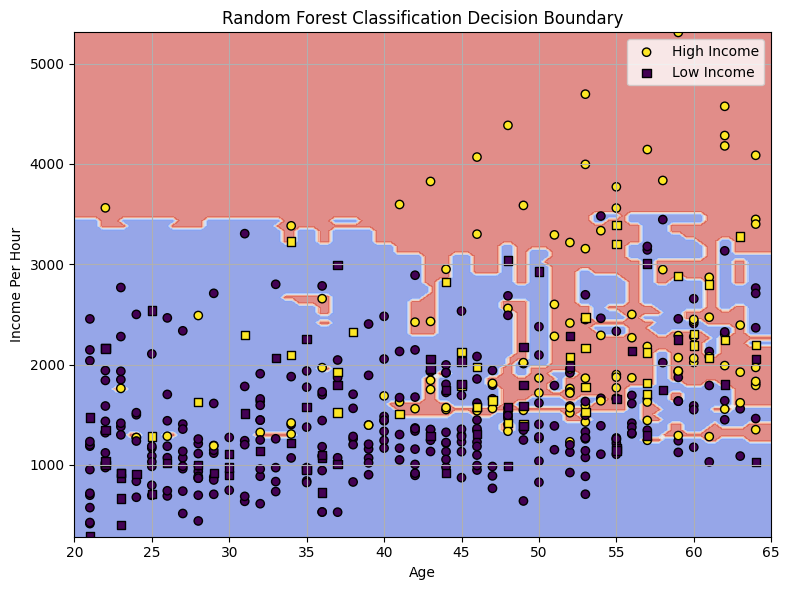

In [5]:
# -----------------------------
# Random Forest 
# -----------------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset 
df = pd.read_csv("income_dataset.csv")

# Feature Engineering
df['income_per_hour'] = df['income'] / df['hours_per_week']

# Selecting features
X = df[['age', 'income_per_hour']].values
y = df['high_income'].values

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Print Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))


Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', label="High Income")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='s', label="Low Income")
plt.xlabel("Age")
plt.ylabel("Income Per Hour")
plt.title("Random Forest Classification Decision Boundary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

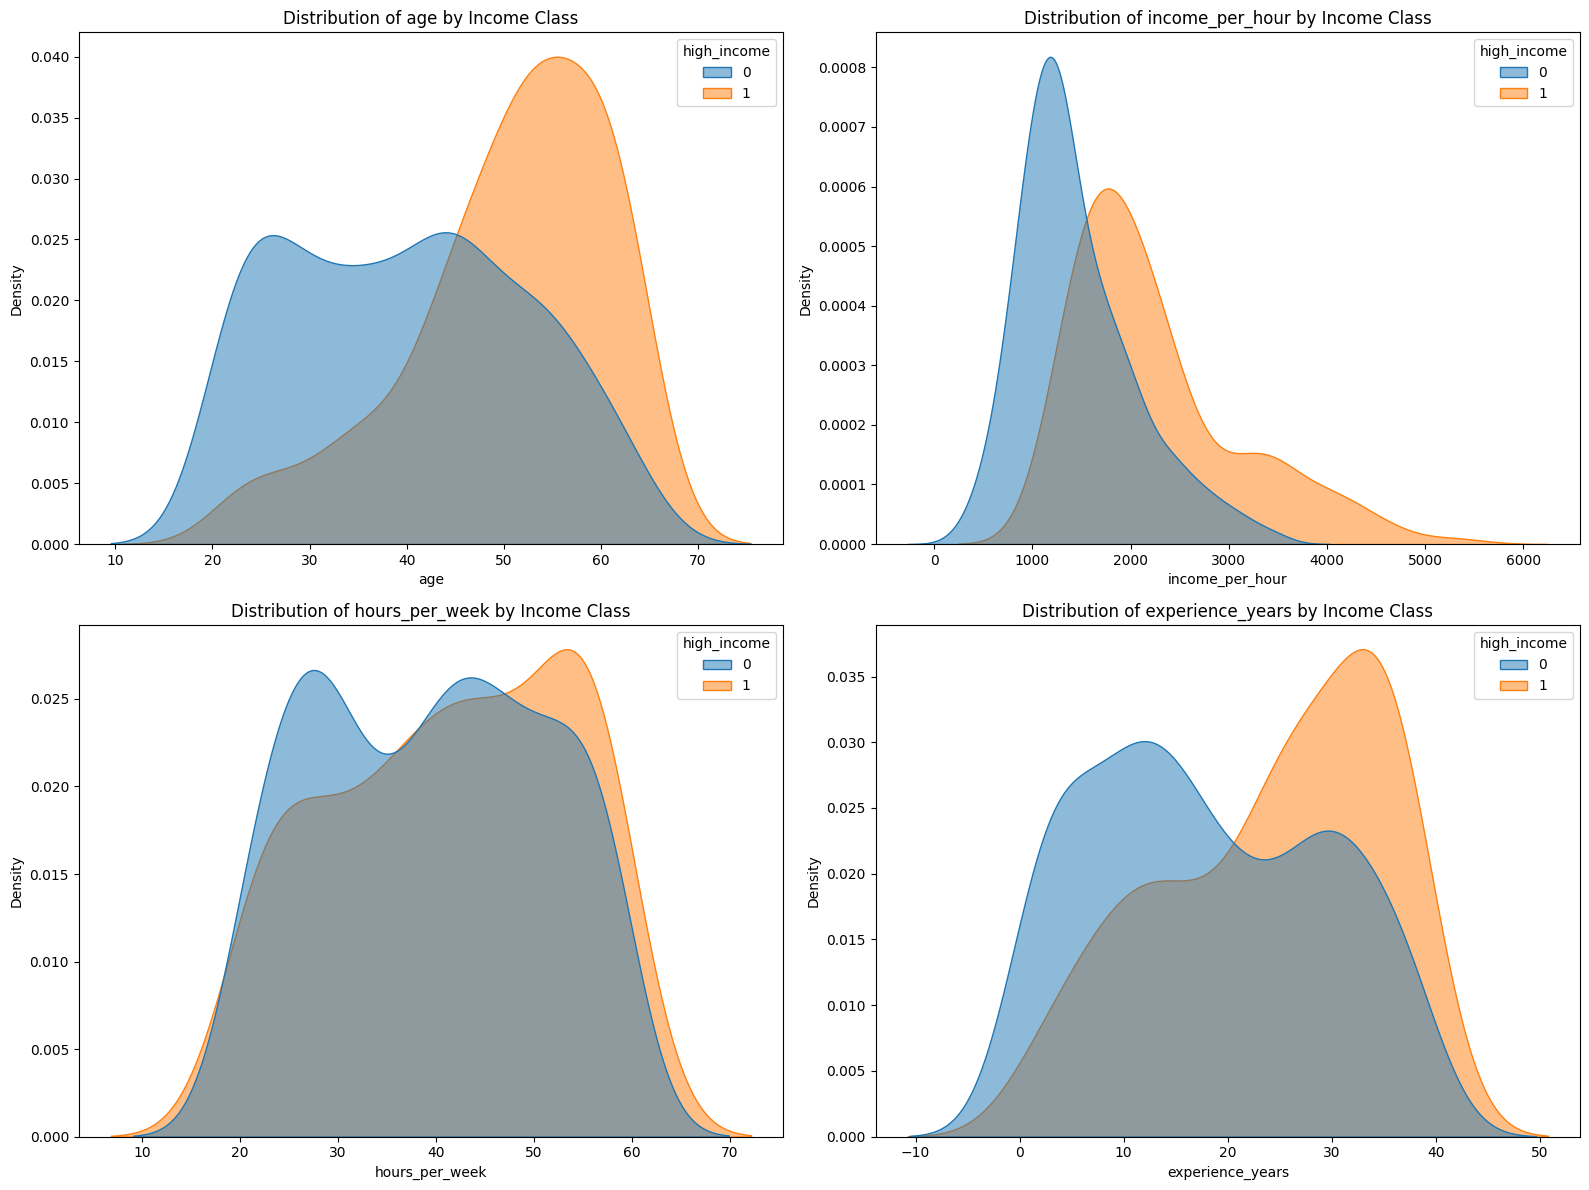

Naive Bayes Accuracy Score: 0.7500


In [6]:
# -----------------------------
# Naive Bayes
# -----------------------------
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Ensure df is a Pandas DataFrame 
df = pd.DataFrame(df)


if 'income_per_hour' not in df.columns:
    df['income_per_hour'] = df['income'] / df['hours_per_week']

features_to_plot = ['age', 'income_per_hour', 'hours_per_week', 'experience_years']
target = 'high_income'

# Plotting distributions
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=df, x=feature, hue=target, fill=True, common_norm=False, alpha=0.5)
    plt.title(f"Distribution of {feature} by Income Class")
    plt.xlabel(feature)
    plt.ylabel("Density")
plt.tight_layout()
plt.show()

# Prepare features and target arrays
X = df[features_to_plot].values
y = df[target].values

# Split data into train and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy score
acc = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy Score: {acc:.4f}")

In [7]:
# -----------------------------
# Accuracy of All Algorithms
# -----------------------------
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Logistic Regression', 'KNN', 'Naive Bayes', 'Random Forest'],
    'Score': [
        r2_score(y_test_reg, y_pred_reg),                     # Linear Regression (R² Score)
        accuracy_score(y_test, y_pred_log),                   # Logistic Regression Accuracy
        accuracy_score(y_test_vis, y_pred_vis),               # KNN Accuracy
        accuracy_score(y_test, y_pred),                       # Naive Bayes Accuracy
        accuracy_score(y_test, model.predict(X_test))         # Random Forest Accuracy
    ]
})

results_df


,Model,Score
0,Linear Regression,0.757531
1,Logistic Regression,0.670000
2,KNN,0.660000
3,Naive Bayes,0.750000
4,Random Forest,0.750000


In [8]:
# -----------------------------
# Using Example Dataset  
# -----------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Load dataset
df = pd.read_csv("heart_disease_data_300.csv")
df = df.dropna() 

# Feature selection
features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
target = "Target"
X, y = df[features], df[target]

# Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features where needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Store accuracy results
results = {}

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
results["K-Nearest Neighbors"] = accuracy_score(y_test, knn_model.predict(X_test_scaled))

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
results["Logistic Regression"] = accuracy_score(y_test, log_model.predict(X_test_scaled))

# Random Forest 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
results["Random Forest"] = accuracy_score(y_test, rf_model.predict(X_test))

# Naïve Bayes 
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
results["Naïve Bayes"] = accuracy_score(y_test, nb_model.predict(X_test))

# Linear Regression 
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg_model.predict(X_test_scaled)
y_pred_lin_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_lin]
results["Linear Regression "] = accuracy_score(y_test, y_pred_lin_binary)


results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)


print("\n Model Accuracy Comparison:\n")
results_df



 Model Accuracy Comparison:



,Model,Accuracy
0,Naïve Bayes,0.533333
1,Linear Regression,0.516667
2,Logistic Regression,0.516667
3,Random Forest,0.500000
4,K-Nearest Neighbors,0.450000
